#### PERFORMANCE METRICS
We have discussed classification and its algorithms in the previous chapters. Here, we are
going to discuss various performance metrics that can be used to evaluate predictions for
classification problems.

## CONFUSION MATRIX
It is the easiest way to measure the performance of a classification problem where the
output can be of two or more type of classes. 
**A confusion matrix is nothing but a table
with two dimensions viz. “Actual” and “Predicted”** and furthermore, both the dimensions
have **“True Positives (TP)”**, **“True Negatives (TN)”**, **“False Positives (FP)”**, **“False Negatives
(FN)”** as shown below:

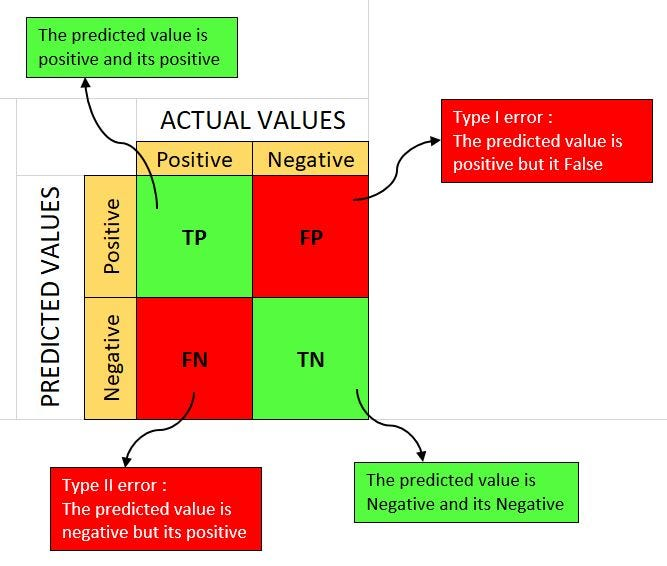




- True Positives (TP): It is the case when both actual class & predicted class of data point is 1.
- True Negatives (TN): It is the case when both actual class & predicted class of data point is 0.
- False Positives (FP): It is the case when actual class of data point is 0 & predicted class of data point is 1.
- False Negatives (FN): It is the case when actual class of data point is 1 & predicted class of data point is 0.


### Classification Accuracy
It is most common performance metric for classification algorithms. It may be defined as
the number of correct predictions made as a ratio of all predictions made. We can easily
calculate it by confusion matrix with the help of following formula:

$ Accuracy = \frac{TP + TN}{TP+FP+FN+TN}  $

We can use accuracy_score function of sklearn.metrics to compute accuracy of our classification model.

### Classification Report
This report consists of the scores of **Precisions, Recall, F1 and Support**. They are explained
as follows:

## Precision 
##### (Of the positives predicted, what percentage is truly positive?)
**Precision**, used in document retrievals, may be defined as the number of correct
documents returned by our ML model. We can easily calculate it by confusion matrix with
the help of following formula:

$ Precision = \frac{TP}{TP+FP}  $

 **Precision tells us how many of the correctly predicted cases actually turned out to be positive.**


## Recall or Sensitivity
##### Of all the positive cases, what percentage are predicted positive?
**Recall** may be defined as the number of positives returned by our ML model. We can easily
calculate it by confusion matrix with the help of following formula:

$ Recall = \frac{TP}{TP+FN}  $


**Recall tells us how many of the actual positive cases we were able to predict correctly with our model.**

## Specificity
##### How well the model is at prediciting negative results?
**Specificity**, in contrast to recall, may be defined as the number of negatives returned by
our ML model. We can easily calculate it by confusion matrix with the help of following
formula:

$ Specificity = \frac{TN}{TN+FP}  $


## Support
**Support** may be defined as the number of samples of the true response that lies in each
class of target values.


## F1 Score
This score will give us the harmonic mean of precision and recall. Mathematically, F1 score
is the weighted average of the precision and recall. **The best value of F1 would be 1 and
worst would be 0**. We can calculate F1 score with the help of following formula:

$ F1 = 2 * \frac{(precision * recall)}{(precision + recall)}  $

F1 score is having equal relative contribution of precision and recall.
**F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.**


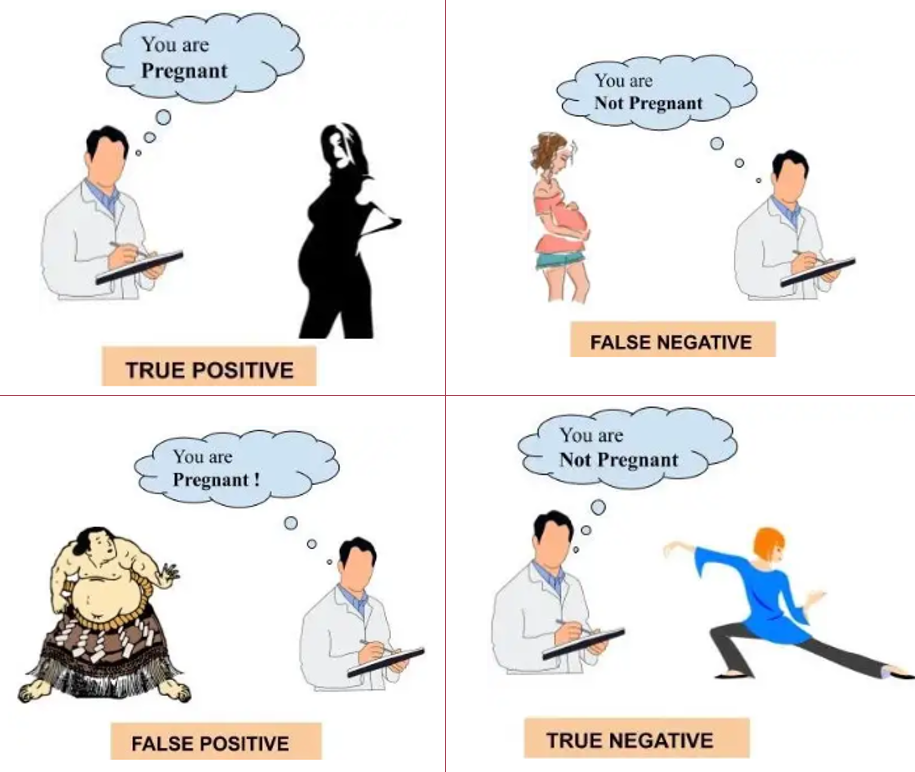

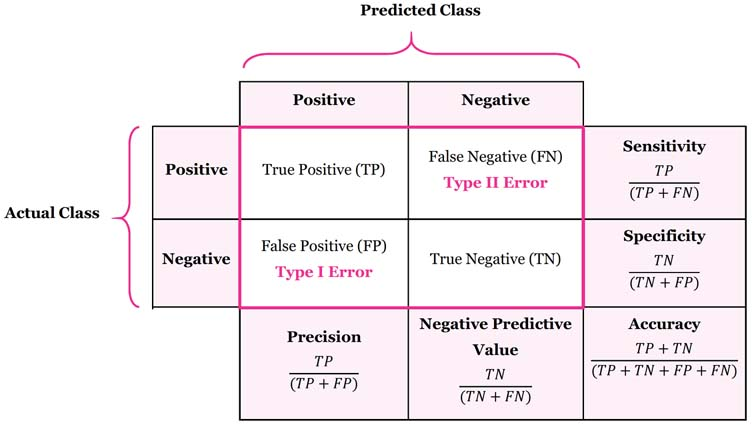

In [1]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
df = df.drop('Id', axis=1)

In [4]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [5]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, shuffle=True)

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

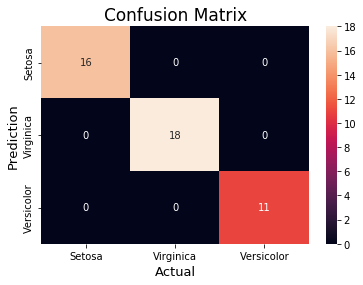

In [16]:
import matplotlib.pyplot as plt  
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Setosa','Virginica','Versicolor'],
            yticklabels=['Setosa','Virginica','Versicolor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**fmt='g'**: This is a format specifier for general floating-point format. It is used to display numbers in a format that is neither too long nor too short. The format will be chosen to best fit the number of digits required to represent the value, either in fixed-point or exponential notation, depending on the value and the precision.

# CROSS VALIDATION

### What is cross-validation?
**Cross-validation is a technique for evaluating a machine learning model and testing its performance**. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem.

CV is easy to understand, easy to implement, and it tends to have a lower bias than other methods used to count the model’s efficiency scores. All this makes cross-validation a powerful tool for selecting the best model for the specific task.

There are a lot of different techniques that may be used to cross-validate a model. Still, all of them have a similar algorithm:

- Divide the dataset into two parts: one for training, other for testing
- Train the model on the training set
- Validate the model on the test set
- Repeat 1-3 steps a couple of times. This number depends on the CV method that you are using

## Hold-out Cross-Validation
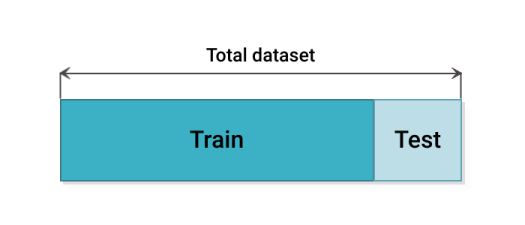

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("iris.csv")
df 

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [197]:
df.shape

(150, 6)

In [198]:
df = df.drop('Id',axis=1)

In [199]:
# Putting feature variable to X
X = df.drop('Species',axis=1)
# Putting response variable to y
y = df['Species']

In [200]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [209]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)
#clf=RandomForestClassifier()
clf=LogisticRegression()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

LogisticRegression()

##### Prediction on Testing data

In [227]:
y_pred = clf.predict(X_test)

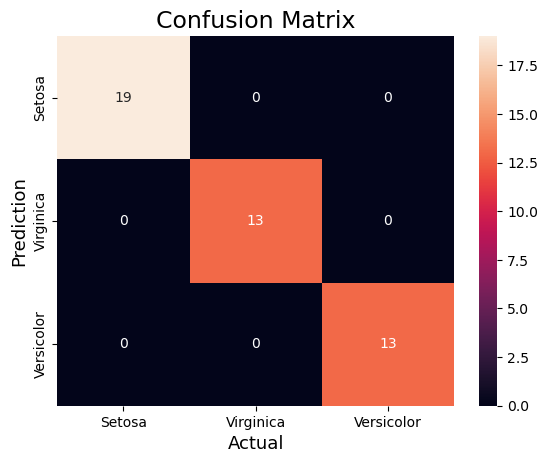

In [228]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Setosa','Virginica','Versicolor'],
            yticklabels=['Setosa','Virginica','Versicolor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [219]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

Accuracy   : 1.0


##### Prediction on Training data

In [213]:
y_pred = clf.predict(X_train)

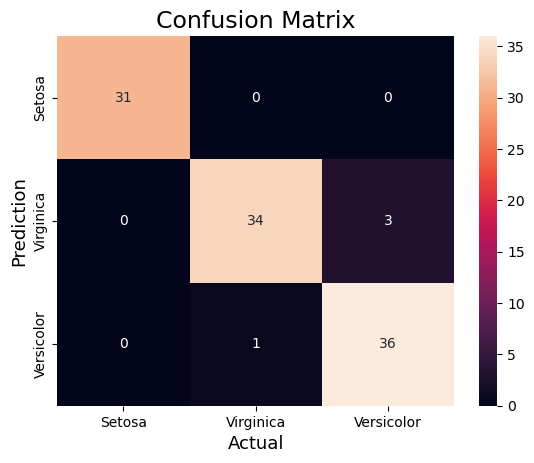

In [214]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Setosa','Virginica','Versicolor'],
            yticklabels=['Setosa','Virginica','Versicolor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [216]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy   :", accuracy)

Accuracy   : 0.9619047619047619


## K-Fold Cross-Validation
k-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method. k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.

The algorithm of the k-Fold technique:

- Pick a number of folds – k. Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.
- Split the dataset into k equal (if possible) parts (they are called folds)
- Choose k – 1 folds as the training set. The remaining fold will be the test set
- Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
- Validate on the test set
- Save the result of the validation
- Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
- To get the final score average the results that you got on step 6.

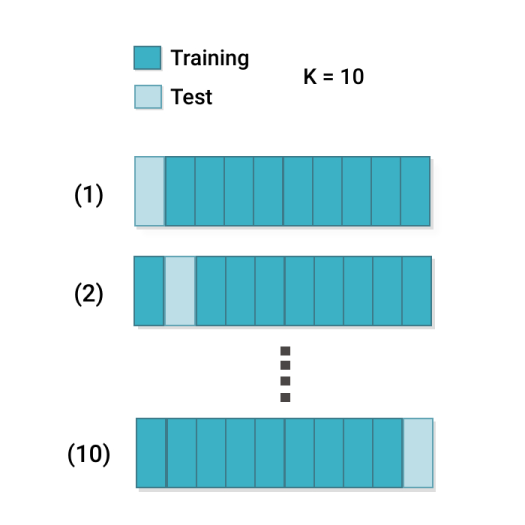

In [222]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score

# k_folds = KFold(n_splits = 3)

#scores = cross_val_score(clf, X, y, cv = k_folds)
cv_scores_5_folds = cross_val_score(clf,X,y,cv=KFold(n_splits=5))
cv_predicts_5_folds = cross_val_predict(clf,X,y,cv=KFold(n_splits=5))

In [224]:
print("Accuracy score in each iteration: {}".format(cv_scores_5_folds))
#print("Predicted class for each record: {}".format(cv_predicts_5_folds))
print("K-Fold Score: {}".format(np.mean(cv_scores_5_folds)))

Accuracy score in each iteration: [1.         1.         0.86666667 0.93333333 0.83333333]
K-Fold Score: 0.9266666666666665


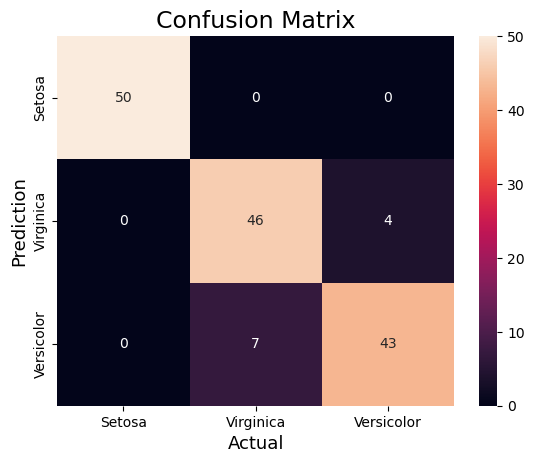

In [225]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y, cv_predicts_5_folds)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Setosa','Virginica','Versicolor'],
            yticklabels=['Setosa','Virginica','Versicolor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [226]:
accuracy = accuracy_score(y, cv_predicts_5_folds)
print("Accuracy   :", accuracy)

Accuracy   : 0.9266666666666666


###  K-Fold & Startified K-Fold
- **K-Fold Cross Validation**: Splits the data into k "random" folds

- **Stratified Cross Valiadtion**: Splits the data into k folds, making sure each fold is an appropriate representative of the original data. (class distribution, mean, variance, etc)


Example of 5 fold Cross Validation:
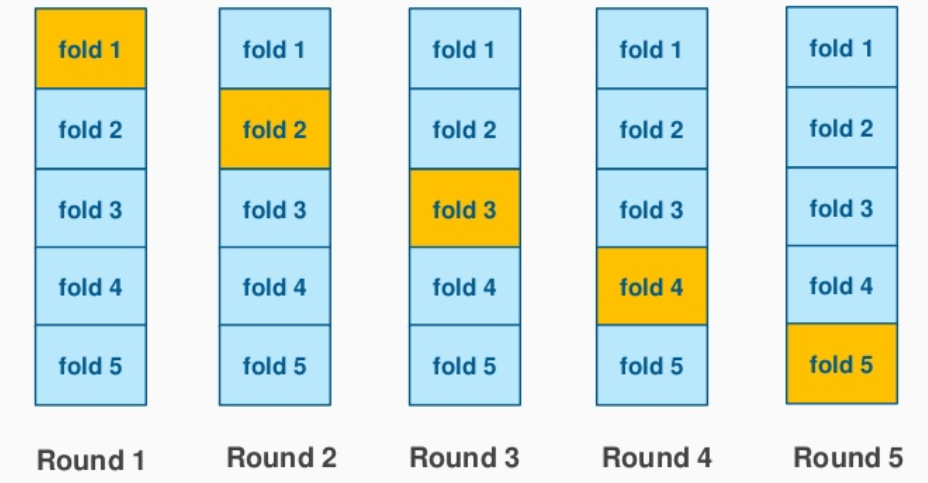

Example of 5 folds Stratified Cross Validation:
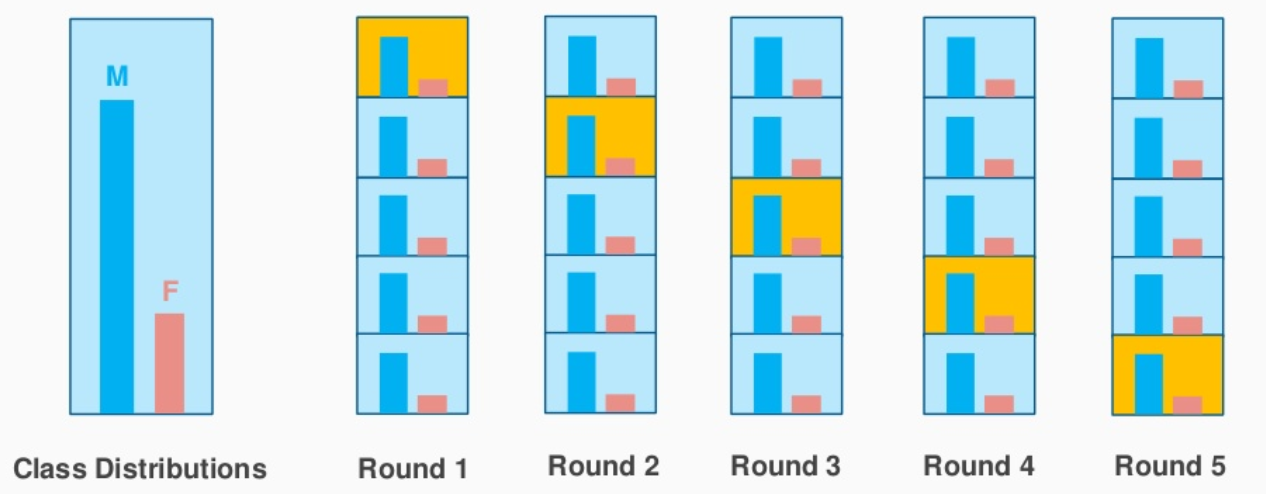

## Stratified K-Fold

Sometimes we may face a large imbalance of the target value in the dataset. For example, in a dataset concerning wristwatch prices, there might be a larger number of wristwatch having a high price. In the case of classification, in cats and dogs dataset there might be a large shift towards the dog class.

Stratified k-Fold is a variation of the standard k-Fold CV technique which is designed to be effective in such cases of target imbalance. 

It works as follows. Stratified k-Fold splits the dataset on k folds such that each fold contains approximately the same percentage of samples of each target class as the complete set. In the case of regression, Stratified k-Fold makes sure that the mean target value is approximately equal in all the folds.

**Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold**

The algorithm of Stratified k-Fold technique:

- Pick a number of folds – k
- Split the dataset into k folds. Each fold must contain approximately the same percentage of samples of each target class as the complete set 
- Choose k – 1 folds which will be the training set. The remaining fold will be the test set
- Train the model on the training set. On each iteration a new model must be trained
- Validate on the test set
- Save the result of the validation
- Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
- To get the final score average the results that you got on step 6.

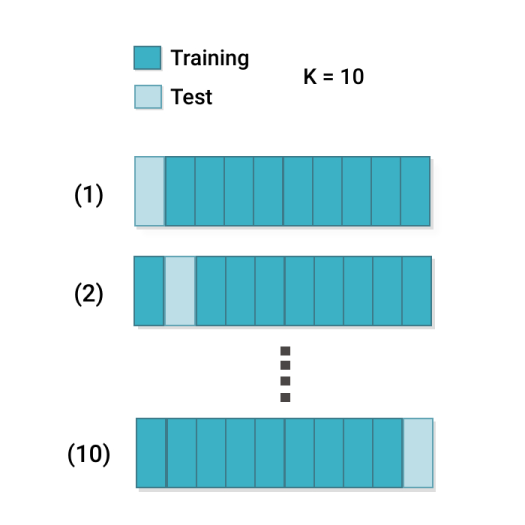

In [233]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=2)

#scores = cross_val_score(clf, X, y, cv = k_folds)
cv_scores_skf = cross_val_score(clf,X,y,cv=skf)
cv_predicts_skf = cross_val_predict(clf,X,y,cv=skf)

In [234]:
print("Accuracy score in each iteration: {}".format(cv_scores_skf))
#print("Predicted class for each record: {}".format(cv_predicts_5_folds))
print("Stratified K-Fold Score: {}".format(np.mean(cv_scores_skf)))

Accuracy score in each iteration: [0.96 0.96]
Stratified K-Fold Score: 0.96


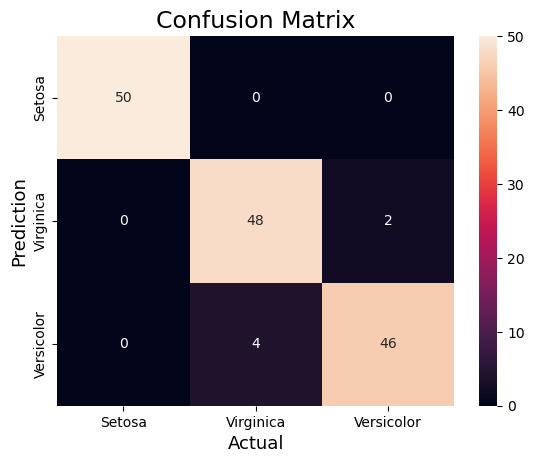

In [235]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y, cv_predicts_skf)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Setosa','Virginica','Versicolor'],
            yticklabels=['Setosa','Virginica','Versicolor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [236]:
accuracy = accuracy_score(y, cv_predicts_skf)
print("Accuracy   :", accuracy)

Accuracy   : 0.96


## Leave-one-out Cross Validation

Leave-one-out сross-validation (LOOCV) is an extreme case of k-Fold CV. Imagine if k is equal to n where n is the number of samples in the dataset. Such k-Fold case is equivalent to Leave-one-out technique.


The algorithm of LOOCV technique:

- Choose one sample from the dataset which will be the test set
- The remaining n – 1 samples will be the training set
- Train the model on the training set. On each iteration, a new model must be trained
- Validate on the test set
- Save the result of the validation
- Repeat steps 1 – 5 n times as for n samples we have n different training and test sets
- To get the final score average the results that you got on step 5.

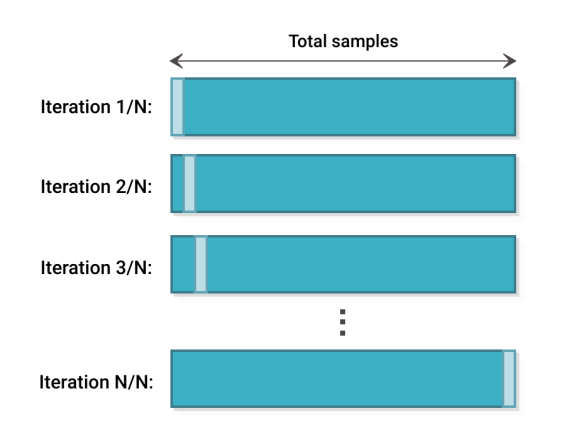

In [229]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()

cv_scores_loo = cross_val_score(clf,X,y,cv=loo)
cv_predicts_loo = cross_val_predict(clf,X,y,cv=loo)

In [230]:
print("Accuracy score in each iteration: {}".format(cv_scores_loo))
#print("Predicted class for each record: {}".format(cv_predicts_5_folds))
print("LOOCV Score: {}".format(np.mean(cv_scores_loo)))

Accuracy score in each iteration: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
LOOCV Score: 0.9666666666666667


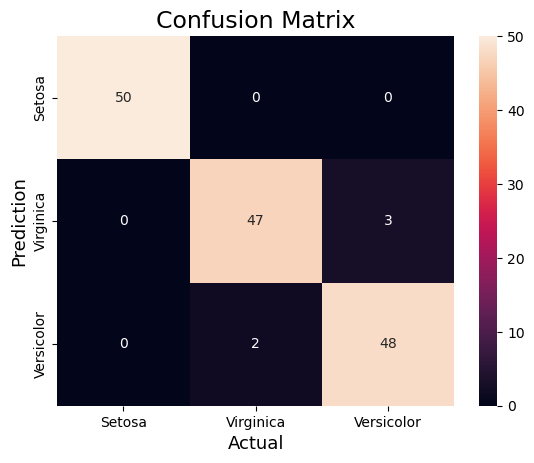

In [231]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y, cv_predicts_loo)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Setosa','Virginica','Versicolor'],
            yticklabels=['Setosa','Virginica','Versicolor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [232]:
accuracy = accuracy_score(y, cv_predicts_loo)
print("Accuracy   :", accuracy)

Accuracy   : 0.9666666666666667


# OVERFITTING IN MACHINE LEARNING
**Overfitting is a situation that happens when a machine learning algorithm becomes too specific to the training data and doesn’t generalize well to new data.**
If you’ve been working with machine learning models, you’ve probably experienced situations where your model shows very high accuracy on training data but poor accuracy on test data.Moreover, it can be very frustrating if we can’t find a solution to this anomalous behavior of the predictive model we’re working on.

#### Example
Suppose a student is preparing for an exam and studying all non-exam-related topics in a book. Then he overburdened himself by learning the things that have no relevance from an exam point of view(noise). And also he memorizes things. Then what will happen? If you ask exactly what he practiced, he will perform well in class, but if you ask some application-based questions in a test where he has to apply his knowledge, then he will need help to perform well. In short, it will perform well on training data rather than test data. In the same way, the machine learning model, if overfitted, will perform poorly on test data but on training data.

Suppose we want to find the price of a house.We trained the model and model is giving 99% accuracy score on training data.And then we test the model performance on test data and we get the accuracy score=50%.Why this much difference? **The reason is that the model is overfitted and thats why its performing good on training data and bad on testing data.**

#### Why Is Overfitting a Problem?
Say you’re a data scientist. You’ve got a big data set that you want to use to train your machine-learning algorithm. You partition the data set into a training set and a validation set. You feed the training set into your algorithm, and it produces some really impressive results.

But what happens when you test the algorithm on the validation set? It will not perform as well on test data as it did on the training set. Why is that? Because you’ve to overfit your algorithm to the training data set.The model do mistakes while predicting because of numerous reasons. These mistakes are bias and variance.

**Bias** is the error in calculating the difference between the model’s average prediction and the actual value we are trying to predict.

**Variance** is the opposite of bias. Variance is also the error that measures the randomness of the predicted values ​​from the actual values.

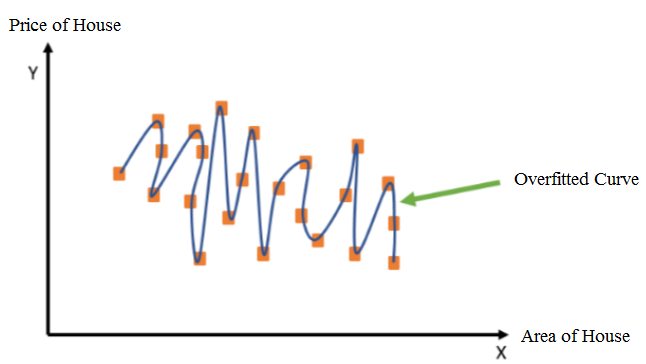

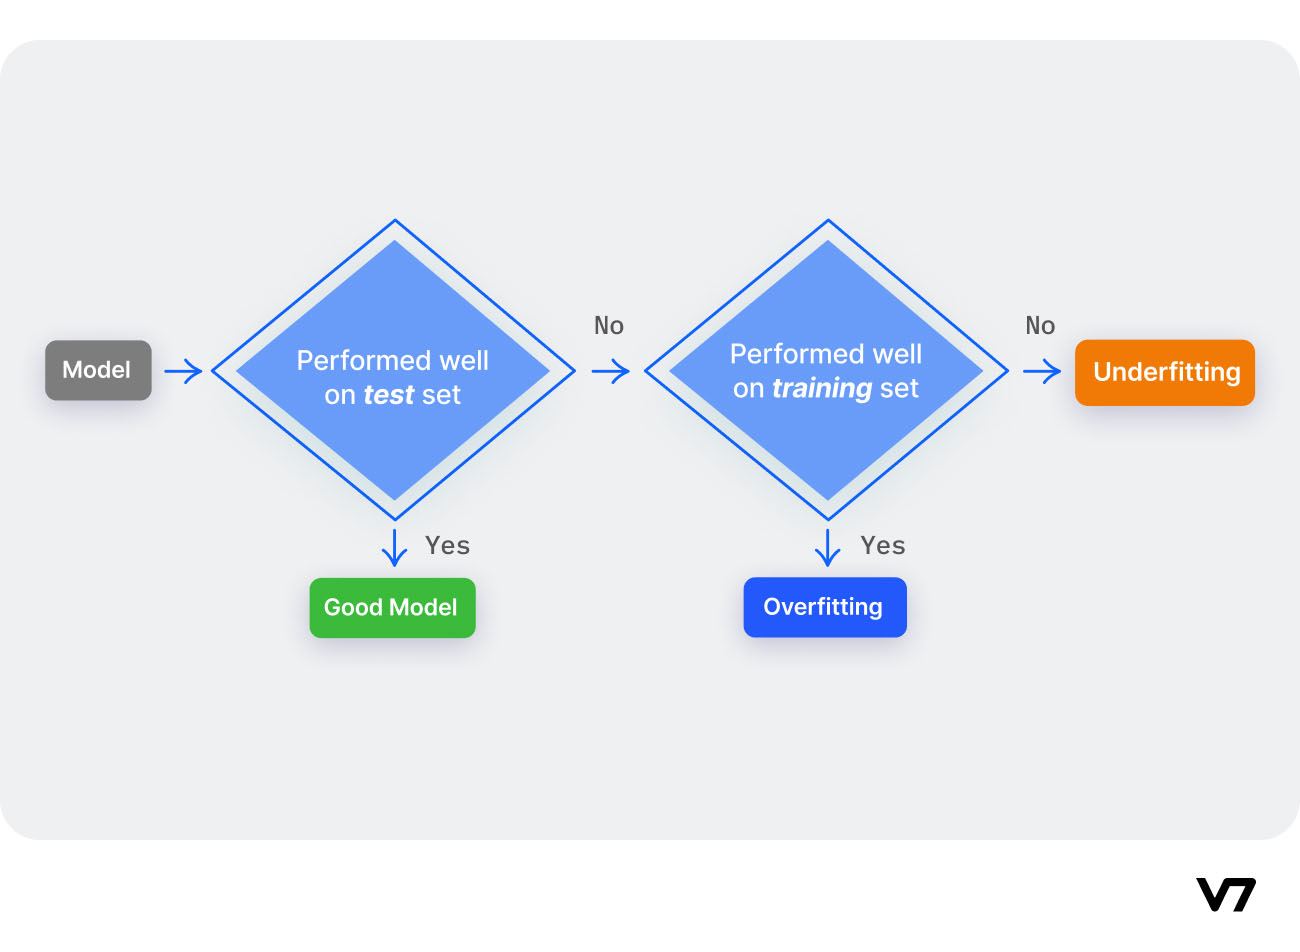

### Reasons for Overfitting
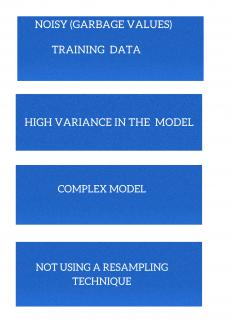

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("homeprices.csv")
df 

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000

In [238]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['town']=le.fit_transform(df['town'])
df  

town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000

In [239]:
# Putting feature variable to X
X = df.drop('price',axis=1)
# Putting response variable to y
y = df['price']

In [240]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [241]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [242]:
#Predicting the test set results
Pred = clf.predict(X_test)
print(Pred)


[600000 585000 565000 650000]


In [243]:
from sklearn.metrics import classification_report
rand_score=clf.score(X_train, y_train)
'''rand_score=classifier.accuracy_score(y_test,Pred)'''
classification_report_rf=classification_report(y_test,Pred)
print("Accuracy score:",rand_score)


Accuracy score: 1.0


In [244]:
from sklearn.metrics import classification_report
rand_score=clf.score(X_test, y_test)
'''rand_score=classifier.accuracy_score(y_test,Pred)'''
classification_report_rf=classification_report(y_test,Pred)
print("Accuracy score:",rand_score)

Accuracy score: 0.0


When we check, the testing accuracy we get Accuracyscore=0 which means accuracy is 0%.Now you can see the difference between the accuracy score in case of training and testing.This clearly shows that the model is overfitted.

### How to avoid Overfitting?
- Using K-fold cross-validation
- Using Regularization techniques such as Lasso and Ridge
- Implementing ensembling techniques.
- Picking a less parameterized/complex model
- Training the model with sufficient data

# UNDERFITTING IN MACHINE LEARNING

Underfitting is just the opposite of overfitting. In overfitting, the model was trying to learn everything(including noise data) and in underfitting, the machine learning model is not able to capture the underlying trend of the data.

In some cases when the overfitting scenario starts, the fed of training data should be stopped at an early stage, because of which the model may not learn enough from the training data. As the training data was not enough, the model may fail to find the best fit of the dominant trend in the data. Hence the accuracy is reduced and will produce unreliable predictions.

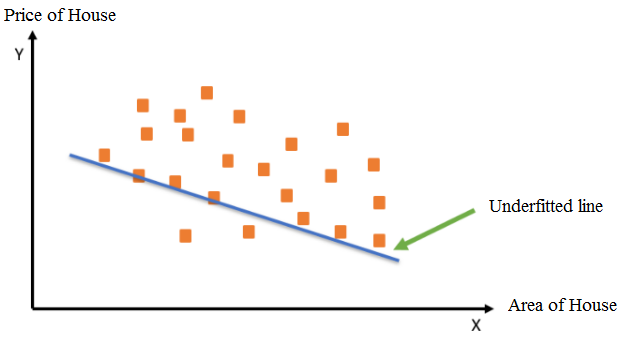

Scenario example: It is the same as you are giving less study material to the student. So he is not trained properly and will not be able to perform well in exams. Now, what is the solution? The solution is very simple, train the student well.

**Underfitting can be easily detected by performance metrics. And it can be easily tackled by trying different machine learning algorithms.**

So from this example, we can conclude that that model is not performing well on train data as well as test data.

### Reasons for Underfitting
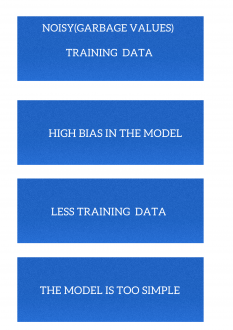

- Uncleaned data(contains noise) used for training is not cleaned 
- High bias in the model.
- Less training data 
- The model is too simple

Ways to Tackle Underfitting
- Preprocessing the data to reduce noise in data
- More training to the model
- Increasing the number of features in the dataset
- Increasing the model complexity
- Reduce noise in the data

### What is a good fit model?
**A good fit model is a balanced model, which is not suffering from underfitting and overfitting.** This is a perfect model which gives good accuracy score during training and equally performs well during testing.
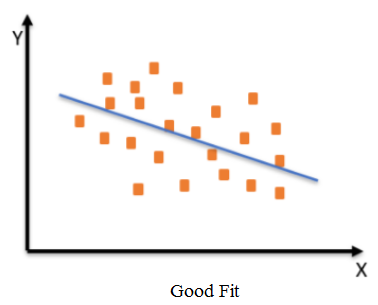



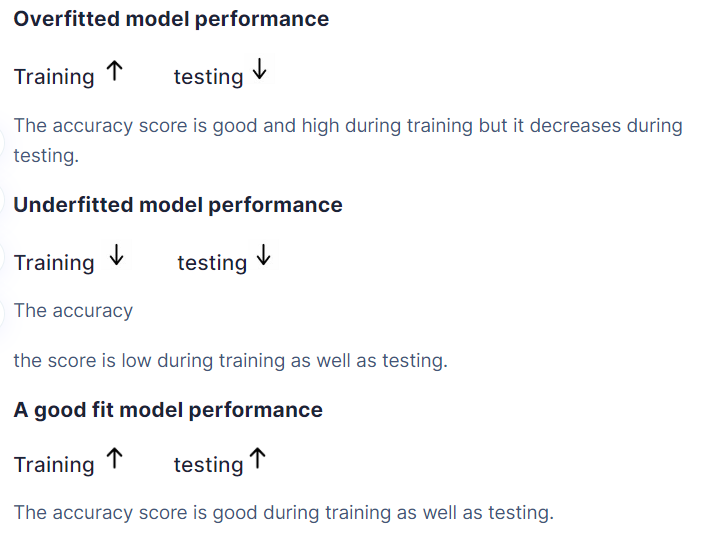

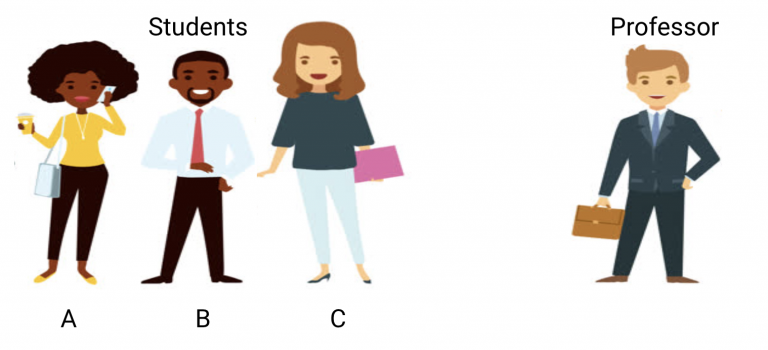
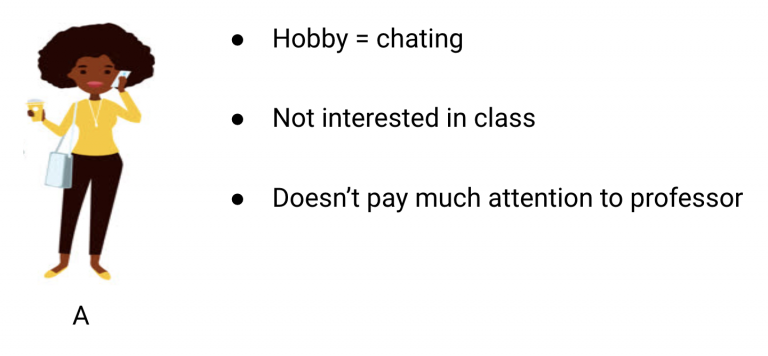
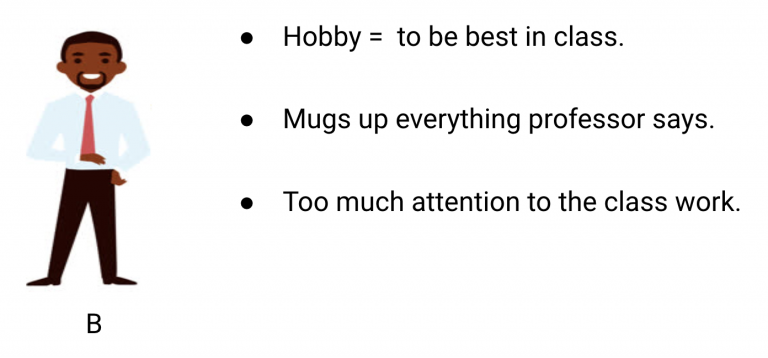
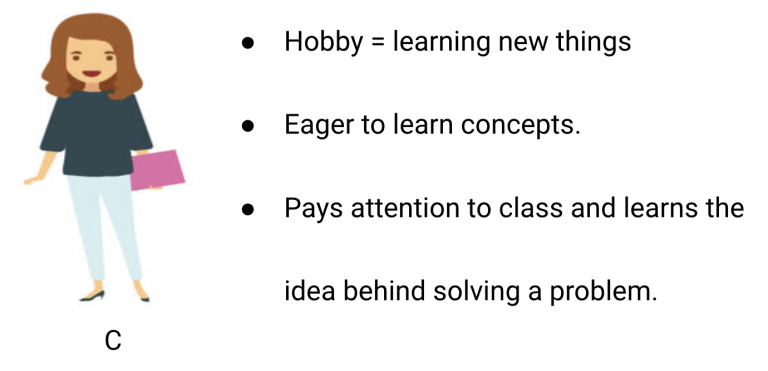
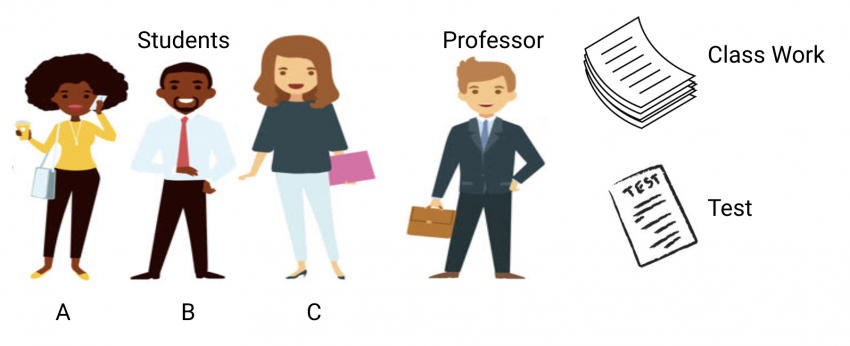
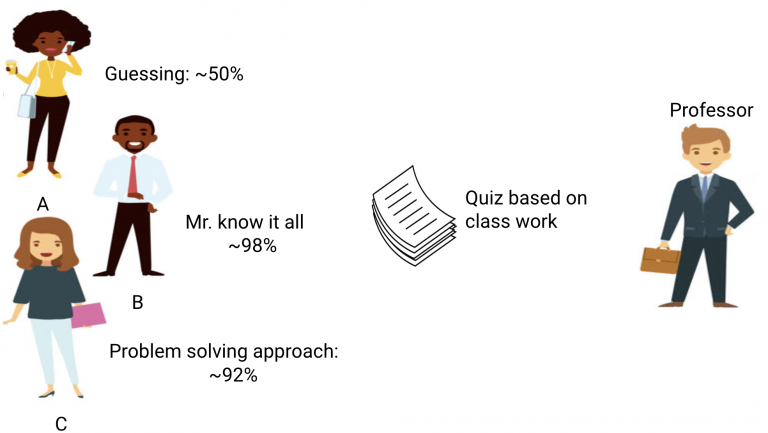
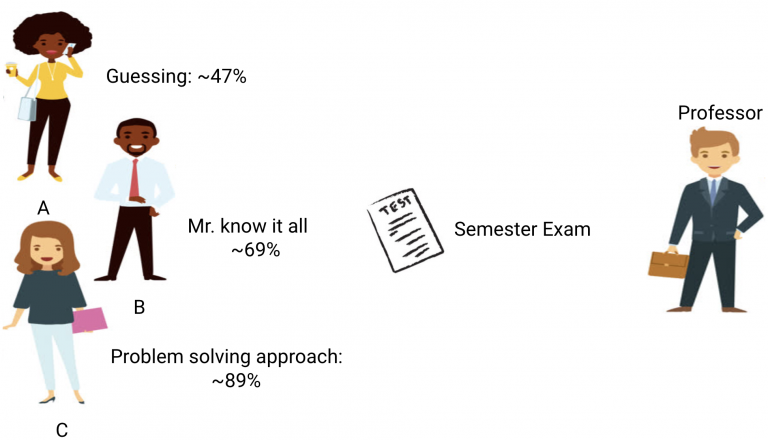

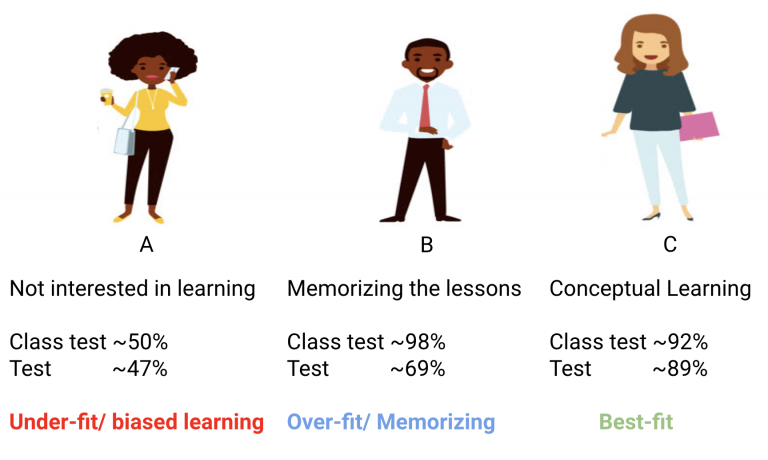

## Errors in ML
There are two main types of errors present in any machine learning model. They are Reducible Errors and Irreducible Errors.

- **Irreducible errors** are errors which will always be present in a machine learning model, because of unknown variables, and whose values cannot be reduced.
- **Reducible errors** are those errors whose values can be further reduced to improve a model. They are caused because our model’s output function does not match the desired output function and can be optimized.
We can further divide reducible errors into two: Bias and Variance.
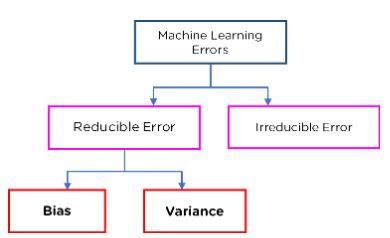

When you build machine learning models, your aim is minimize the error in the model. It means that the model should be able to make accurate predictions on previously unseen data.

#### To reduce the errors, you need to understand where the errors can come from.


## Example:
Let’s consider the problem of loan defaults. To grow the business, financial firms have to issue loans on a large scale and recover them. Since they deal in large volumes, they need to automate this process in order to keep up.

Their goal is to estimate the likelihood of a person defaulting on a loan. This helps them identify individuals who won't default on their loans.

#### What's stopping our model from being perfect? What are the sources of error?
In an ideal world, this firm will get the required information about every single person in the world (e.g. age, income, credit history) and then make the inference on who's going to default. But that's not possible in the real world. In the real world, you can only gather information from a small group of people — say 5,000 — and then use this information to build a model. This model extracts the pattern and quantifies it in a model. In machine learning parlance, this whole process is called "training".

The job of this model is to take in the key input parameters from a new applicant (e.g. age, income, credit history) and make a prediction on whether or not they're going to default.

This model is only an estimate of the true formula and actually doesn't represent the true formula. To get the true formula, you need to gather information from every single person in the world. That’s obviously not going to happen here. We can only estimate something that’s as close as possible to this true formula.

**The difference between our model's prediction and the actual value is called error due to bias.**

Let’s call this 'X'. We want this to be as low as possible. It means that our prediction needs to be as close as possible to the real value.

#### What if we conduct this experiment with a different set of 5,000 people?
Let’s say we repeat the above experiment with a different set of 5,000 people and build a new model. Now this new model is going to predict the likelihood of default using the input parameters. This model will have an error due to bias as well. Let’s call it 'Y'. X won't be equal to Y.

Now go ahead and repeat the experiment a bunch of times with different sets of 5,000 people. You'll see how the error values fluctuate. If everything is perfect, the predictions shouldn't fluctuate.

If they fluctuate too much, then the model depends way too much on what set of 5,000 people we choose for training. It's not a good model because it won't generalize well to new people. If all the above predictions are close to each other, then we can say that the variance is low.

**This spread in values is called "error due to variance". It measures how sensitive the model is to variations in the training data.**





# BIAS & VARIANCE
### What is Bias?
**The bias is known as the difference between the prediction of the values by the Machine Learning model and the correct value.**

Bias is the error that calculates the difference between the average prediction of our model and the actual value that we are trying to predict. 

This shows the model is not able to capture other details while predicting as it has bias. 

Characteristics of a high bias model include:

- Not able to capture proper data trends
- Trained over noise also. So giving less accurate results
- Suffers from underfitting
- A more general or simple model




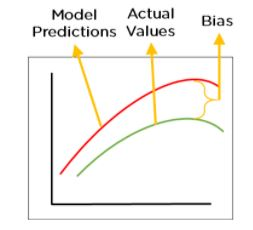


### What is variance?
Variance is the opposite of Bias. Variance is also an error that measures the randomness of the predicted value from the actual value.

**Variance, is a type of error that occurs due to a model's sensitivity to small fluctuations in the training set.**

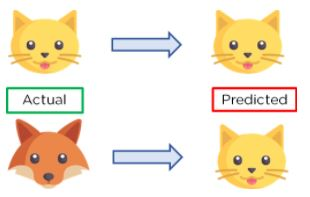


In the above figure, we can see that our model has learned extremely well for our training data, which has taught it to identify cats. But when given new data, such as the picture of a fox, our model predicts it as a cat, as that is what it has learned. This happens when the Variance is high, our model will capture all the features of the data given to it, including the noise, will tune itself to the data, and predict it very well but when given new data, it cannot predict on it as it is too specific to training data. 


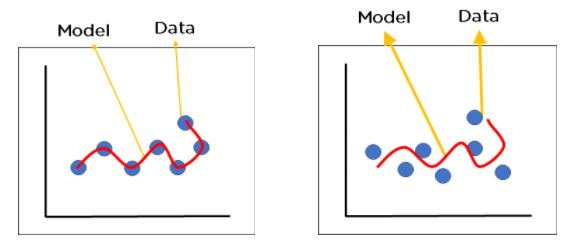

### Example
Imagine you're trying to learn how to throw darts at a target. Let's talk about two important things: "Bias" and "Variance".

- **Bias**: Imagine you're learning to throw darts, and your teacher tells you to always aim at the center of the target. But, let's say your aim is not so good, and you always tend to throw the darts a bit away from the bullseye. This is like having bias. It means your throws are consistently off-target, even if you're trying to aim at the center every time. In simple terms, bias is like always making the same kind of mistake.

- **Variance**: Now, let's say you're throwing darts again, but this time, you're all over the place. Sometimes you hit near the bullseye, and other times you hit far away. Your throws are very inconsistent. This is like having high variance. It means your throws are spread out all over the place. In simple terms, variance is like being all over the map.

So, to summarize:

- **Bias** is like consistently making the same mistake (like always aiming a bit to the left).
- **Variance** is like being all over the place, with throws sometimes close to the target and sometimes far away.


In machine learning, we want to find a good balance between bias and variance. Too much bias means the model is consistently wrong, too much variance means the model is too sensitive to small changes in the data. We want our model to be just right, hitting the target as close as possible on average, while also being consistent.

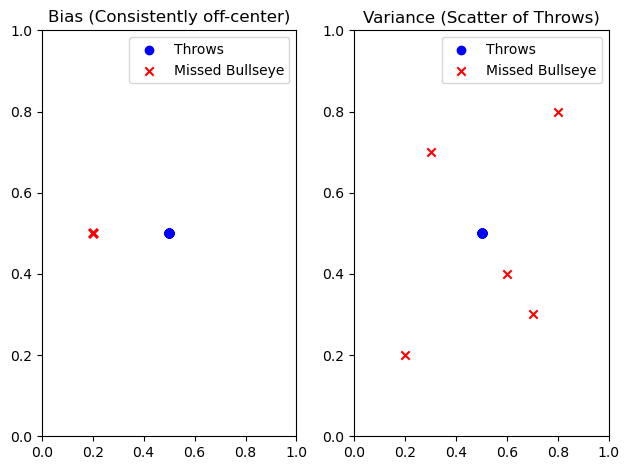

In [1]:
import matplotlib.pyplot as plt

# Bias: Consistently off-center throws
plt.subplot(1, 2, 1)
plt.scatter([0.5]*50, [0.5]*50, color='blue', label='Throws')
plt.scatter([0.2]*10, [0.5]*10, color='red', label='Missed Bullseye', marker='x')
plt.title('Bias (Consistently off-center)')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)

# Variance: Scatter of throws
plt.subplot(1, 2, 2)
plt.scatter([0.5]*50, [0.5]*50, color='blue', label='Throws')
plt.scatter([0.2, 0.8, 0.3, 0.7, 0.6], [0.2, 0.8, 0.7, 0.3, 0.4], color='red', label='Missed Bullseye', marker='x')
plt.title('Variance (Scatter of Throws)')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()




### BIAS VARIANCE TRADEOFF
Till now we got the idea that in order to avoid overfitting and underfitting in the model we have to decrease bias and variance.

If the model is having fewer parameters, it may have low variance and high bias. Whereas, if the model is complex with a large number of parameters, it will have high variance and low bias. So, there is a need to strike a balance between bias and variance errors, and this **balance between the bias error and variance error is known as the Bias-Variance trade-off.**



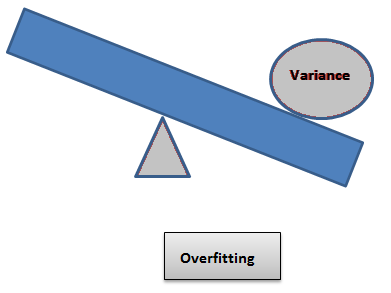

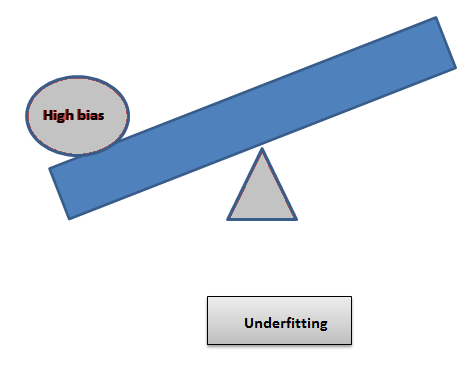

- **Low Bias**: Suggests less assumptions about the form of the target function.
- **High-Bias**: Suggests more assumptions about the form of the target function.

- **Low Variance**: Suggests small changes to the estimate of the target function with changes to the training dataset.
- **High Variance**: Suggests large changes to the estimate of the target function with changes to the training dataset.

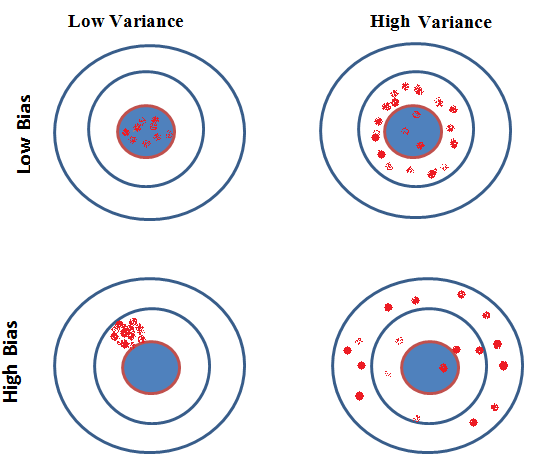

- **Low-Bias, Low-Variance:** The combination is an ideal machine learning model. However, it is not possible practically.

- **Low-Bias, High-Variance:** This is a case of overfitting where model predictions are inconsistent and accurate on average. The predicted values will be accurate(average) but will be scattered.

- **High-Bias, Low-Variance:** This is a case of underfitting where predictions are consistent but inaccurate on average. The predicted values will be inaccurate but will be not scattered.

- **High-Bias, High-Variance:** With high bias and high variance, predictions are inconsistent and also inaccurate on average.


**Below are two examples of configuring the bias-variance trade-off for specific algorithms:**

- The **k-nearest neighbors algorithm** has low bias and high variance, but the trade-off can be changed by increasing the value of k which increases the number of neighbors that contribute t the prediction and in turn increases the bias of the model.
- The **support vector machine algorithm** has low bias and high variance, but the trade-off can be changed by increasing the C parameter that influences the number of violations of the margin allowed in the training data which increases the bias but decreases the variance.